# Plotting code
The notebook for t-sne (2D, 3D) and UMAP code

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [72]:
import pandas as pd
import numpy as np
import os, sys
import argparse
from datetime import datetime
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate

In [73]:
#https://stackoverflow.com/questions/50204556/tkinter-tclerror-couldnt-connect-to-display-localhost10-0-when-using-wordc
matplotlib.use('Agg')

In [75]:
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd

#####show ploting result
import matplotlib.pyplot as plt
%matplotlib inline


input_path='/pod/2/li-lab/Ziwei/Nanopore/daily/test/total.test.bed.gz'
output_path='/pod/2/li-lab/Ziwei/Nanopore/daily/2021-10-28'

df=pd.read_csv(input_path, compression='gzip', sep='\t')
df_feature = df.loc[:,['5hmC_prob','5mC_prob','5C_prob']].values
df_class = np.squeeze(df.loc[:,['label']].values) #Covert Pandas DataFrame to 1D array

## tSNE for 2D

In [110]:
#https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
#Data transofrmation: Get TSNE embedding with 2D

#https://www.reneshbedre.com/blog/tsne.html
# perplexity parameter: default = 30
# dataset with larger number of variables requires larger perplexity
# set this value between 5 and 50 (sklearn documentation)
# verbose=1 displays run time messages
tsne_feature = TSNE(n_components=2, verbose=1, perplexity=50, random_state=42).fit_transform(df_feature) 


#https://medium.com/@violante.andre/an-introduction-to-t-sne-with-python-example-47e6ae7dc58f
##Store tsne result into a dataframe
tsne_df = pd.DataFrame({
    'X': tsne_feature[:,0], #5hmC
    'Y': tsne_feature[:,1], #5mC
    'label': df_class
})

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2497 samples in 0.003s...
[t-SNE] Computed neighbors for 2497 samples in 0.102s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2497
[t-SNE] Computed conditional probabilities for sample 2000 / 2497
[t-SNE] Computed conditional probabilities for sample 2497 / 2497
[t-SNE] Mean sigma: 0.000229
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.943951
[t-SNE] KL divergence after 1000 iterations: 0.312058


Text(0, 0.5, '5mC_prob')

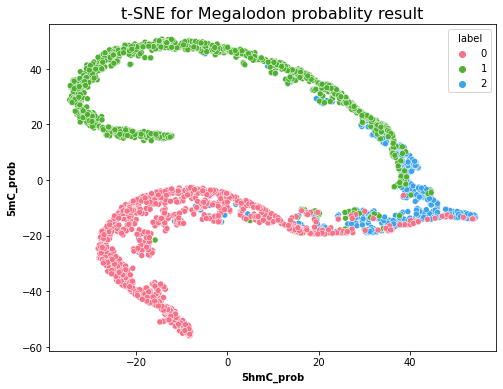

In [145]:
#Set up figure size
plt.figure(figsize=(8,6))

sns.scatterplot(x="X", y="Y",
                hue='label', #annotation
                data=tsne_df,
                palette=sns.color_palette("husl",3))

plt.title('t-SNE for Megalodon probablity result').set_fontsize('16')
plt.xlabel('5hmC_prob', weight = 'bold')
plt.ylabel('5mC_prob', weight = 'bold')

### No normalization

Text(0, 0.5, '5C_prob')

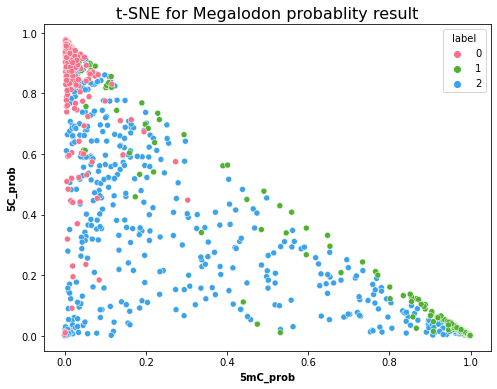

In [156]:
#Set up figure size
df=pd.read_csv(input_path, compression='gzip', sep='\t')
df_feature = df.loc[:,['5hmC_prob','5mC_prob','5C_prob']].values
df_class = np.squeeze(df.loc[:,['label']].values) #Covert Pandas DataFrame to 1D array

tsne_df = pd.DataFrame({
    'X': df_feature[:,1], #5mC
    'Y': df_feature[:,2], #5C
    'label': df_class
})

plt.figure(figsize=(8,6))

sns.scatterplot(x="X", y="Y",
                hue='label', #annotation
                data=tsne_df,
                palette=sns.color_palette("husl",3))

plt.title('t-SNE for Megalodon probablity result').set_fontsize('16')
plt.xlabel('5mC_prob', weight = 'bold')
plt.ylabel('5C_prob', weight = 'bold')

## 3D tSNE

### No normalization

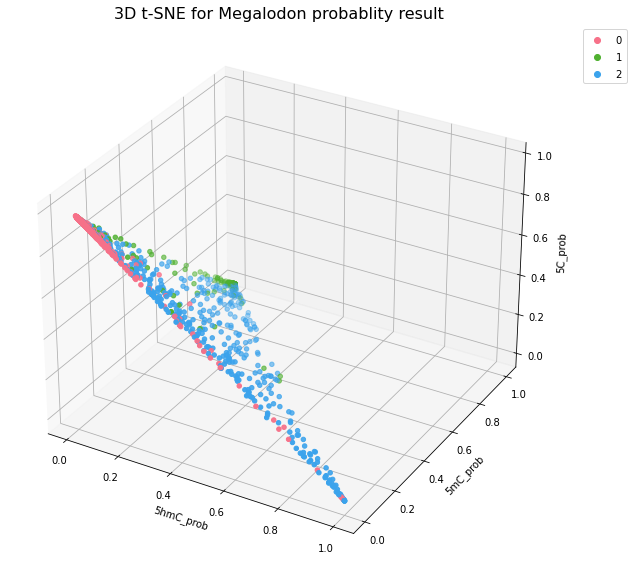

In [152]:
#Set up figure size
df=pd.read_csv(input_path, compression='gzip', sep='\t')
df_feature = df.loc[:,['5hmC_prob','5mC_prob','5C_prob']].values
df_class = np.squeeze(df.loc[:,['label']].values) #Covert Pandas DataFrame to 1D array

tsne_df_3D = pd.DataFrame({
    'X': df_feature[:,0], #5hmC
    'Y': df_feature[:,1], #5mC
    'Z': df_feature[:,2],
    'label': df_class
})


#Set up figure size
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap

%matplotlib inline

##Create figure and axes
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = '3d')

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl",3).as_hex())

sc = ax.scatter(
    xs=tsne_df_3D['X'], 
    ys=tsne_df_3D['Y'], 
    zs=tsne_df_3D['Z'],
    c=tsne_df_3D['label'],  #label
    cmap=cmap #color pattern from seaborn
)

ax.set_xlabel('5hmC_prob')
ax.set_ylabel('5mC_prob')
ax.set_zlabel('5C_prob')
ax.set_title('3D t-SNE for Megalodon probablity result').set_fontsize('16')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

### Normalization

In [115]:
tsne_feature_3D = TSNE(n_components=3, verbose=1, perplexity=50, random_state=42).fit_transform(df_feature) 


#https://medium.com/@violante.andre/an-introduction-to-t-sne-with-python-example-47e6ae7dc58f
##Store tsne result into a dataframe
tsne_df_3D = pd.DataFrame({
    'X': tsne_feature_3D[:,0], #5hmC
    'Y': tsne_feature_3D[:,1], #5mC
    'Z': tsne_feature_3D[:,2],
    'label': df_class
})

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2497 samples in 0.003s...
[t-SNE] Computed neighbors for 2497 samples in 0.103s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2497
[t-SNE] Computed conditional probabilities for sample 2000 / 2497
[t-SNE] Computed conditional probabilities for sample 2497 / 2497
[t-SNE] Mean sigma: 0.000229
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.025253
[t-SNE] KL divergence after 1000 iterations: 0.226371


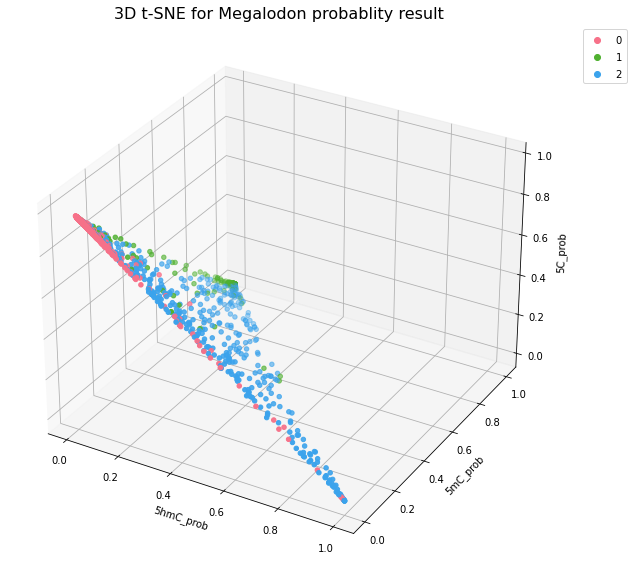

In [157]:
#https://likegeeks.com/3d-plotting-in-python/
#https://stackoverflow.com/a/64603317
#Set up figure size
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap

%matplotlib inline

##Create figure and axes
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = '3d')

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl",3).as_hex())

sc = ax.scatter(
    xs=tsne_df_3D['X'], 
    ys=tsne_df_3D['Y'], 
    zs=tsne_df_3D['Z'],
    c=tsne_df_3D['label'],  #label
    cmap=cmap #color pattern from seaborn
)

ax.set_xlabel('5hmC_prob')
ax.set_ylabel('5mC_prob')
ax.set_zlabel('5C_prob')
ax.set_title('3D t-SNE for Megalodon probablity result').set_fontsize('16')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()